<a href="https://colab.research.google.com/github/bktamu/ANN-Customer-Churn/blob/main/book_recommendation_on_paper_of_book_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
dataset1_path = "/content/drive/MyDrive/datasetcampusxbook/Books.csv"
books = pd.read_csv(dataset1_path)

<ipython-input-4-1f6c7390fd85>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(dataset1_path)


In [ ]:
dataset2_path = "/content/drive/MyDrive/datasetcampusxbook/Users.csv"
users = pd.read_csv(dataset2_path)

In [ ]:
dataset2_path = "/content/drive/MyDrive/datasetcampusxbook/Ratings.csv"
ratings = pd.read_csv(dataset2_path)

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('ISBN').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name '_df_2' is not defined

In [ ]:
from matplotlib import pyplot as plt
_df_1['Book-Rating'].plot(kind='hist', bins=20, title='Book-Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name '_df_1' is not defined

In [ ]:
from matplotlib import pyplot as plt
_df_1['Book-Rating'].plot(kind='hist', bins=20, title='Book-Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name '_df_1' is not defined

In [ ]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [ ]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
ratings.duplicated().sum()

0

In [ ]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [ ]:
ratings.merge(books,on='ISBN').shape

(1031136, 10)

In [ ]:
# Check the data types of all columns
print(ratings_with_name.dtypes)

User-ID                 int64
ISBN                   object
Book-Rating             int64
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


In [ ]:
ratings_with_name.shape

(1031136, 10)

In [ ]:
ratings_with_name = ratings_with_name.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)

In [ ]:
ratings_with_name['Year-Of-Publication'] = pd.to_numeric(ratings_with_name['Year-Of-Publication'], errors='coerce')

In [ ]:
#ratings_with_name['Publisher'] = ratings_with_name['Publisher'].astype('category')

In [ ]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995.0,Random House Value Pub
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996.0,Kensington Publishing Corporation
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997.0,Apple
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997.0,Vintage Books USA


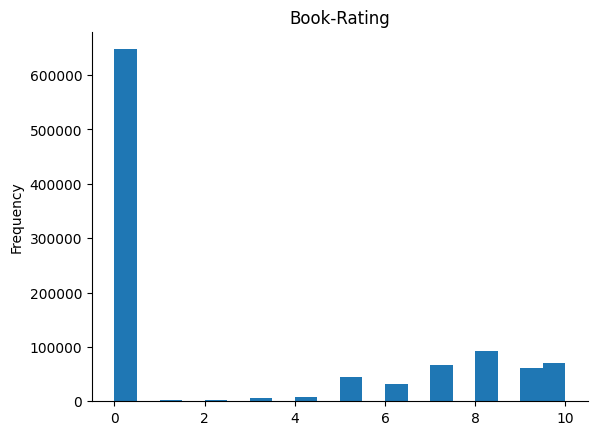

In [ ]:
from matplotlib import pyplot as plt
ratings_with_name['Book-Rating'].plot(kind='hist', bins=20, title='Book-Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
ratings_with_name.dtypes

User-ID                  int64
ISBN                    object
Book-Rating              int64
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
dtype: object

In [ ]:
# Get unique values for each column in the DataFrame
for column in ratings_with_name.columns:
    unique_values = ratings_with_name[column].unique()
    print("Unique values for column '{}':".format(column))
    print(unique_values)
    print()


Unique values for column 'User-ID':
[276725   2313   6543 ... 276618 276647 276660]

Unique values for column 'ISBN':
['034545104X' '0155061224' '0446520802' ... '0590907301' '0679752714'
 '0806917695']

Unique values for column 'Book-Rating':
[ 0  5  9  8  6  7  4 10  3  2  1]

Unique values for column 'Book-Title':
['Flesh Tones: A Novel' 'Rites of Passage' 'The Notebook' ...
 'Triplet Trouble and the Class Trip (Triplet Trouble)'
 'A Desert of Pure Feeling (Vintage Contemporaries)'
 'Perplexing Lateral Thinking Puzzles: Scholastic Edition']

Unique values for column 'Book-Author':
['M. J. Rose' 'Judith Rae' 'Nicholas Sparks' ... 'Kitta Reeds'
 'Kurt Messick' 'Joseph Delissio']

Unique values for column 'Year-Of-Publication':
[2002. 2001. 1996. 1999. 1998. 1994. 1995. 2003. 1997. 2024. 1992. 1983.
 2000.    0. 1989. 1991. 1993. 1976. 1990. 1982. 1988. 1981. 1986. 1987.
 1980. 2004. 1984. 1985. 1979. 1974. 1977. 1965. 1972. 1978. 1962. 1957.
 1958. 1960. 1963. 1969. 1970. 1975. 1959. 

In [ ]:
# Count the number of unique values for each column in the DataFrame
unique_value_counts = ratings_with_name.nunique()
print("Number of unique values in each column:")
print(unique_value_counts)


Number of unique values in each column:
User-ID                 92106
ISBN                   270151
Book-Rating                11
Book-Title             241071
Book-Author            101587
Year-Of-Publication       116
Publisher               16729
dtype: int64


In [ ]:
ratings_with_name.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            2
Year-Of-Publication    4
Publisher              2
dtype: int64

In [ ]:
ratings_with_name = ratings_with_name[ratings_with_name['Book-Rating'] >= 4]


In [ ]:
# Count the number of unique values for each column in the DataFrame
unique_value_counts = ratings_with_name.nunique()
print("Number of unique values in each column:")
print(unique_value_counts)

Number of unique values in each column:
User-ID                 66869
ISBN                   147293
Book-Rating                 7
Book-Title             133311
Book-Author             61123
Year-Of-Publication       105
Publisher               11430
dtype: int64


In [ ]:
ratings_with_name.shape

(374868, 7)

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Subset your DataFrame (e.g., select the first 10000 rows)
subset_ratings_with_name = ratings_with_name.iloc[:50000]

# Step 2: Split into train and test sets
train_data, test_data = train_test_split(subset_ratings_with_name, test_size=0.2, random_state=42)

# Step 3: Proceed with recommendation system development using train and test datasets
# You can use train_data and test_data for training and evaluation


In [ ]:
subset_ratings_with_name.shape

(50000, 7)

In [ ]:
subset_ratings_with_name.dtypes

User-ID                  int64
ISBN                    object
Book-Rating              int64
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
dtype: object

In [ ]:
# Count the number of unique values for each column in the DataFrame
unique_value_counts = subset_ratings_with_name.nunique()
print("Number of unique values in each column:")
print(unique_value_counts)

Number of unique values in each column:
User-ID                21074
ISBN                    2768
Book-Rating                7
Book-Title              2689
Book-Author             1765
Year-Of-Publication       45
Publisher                660
dtype: int64


In [ ]:
train_data.shape

(40000, 7)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Preprocess and vectorize the training data
train_data = subset_ratings_with_name[:40000]
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data['Book-Title'] + ' ' + train_data['Book-Author'] + ' ' + train_data['Publisher'].astype(str))

# Perform K-means clustering on the training data
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(train_vectors)
train_clusters = kmeans.predict(train_vectors)

# Vectorize the test data
test_data = subset_ratings_with_name[40000:]
test_vectors = vectorizer.transform(test_data['Book-Title'] + ' ' + test_data['Book-Author'] + ' ' + test_data['Publisher'].astype(str))

# Assign test data to clusters
test_clusters = kmeans.predict(test_vectors)

# Recommend books for users in the test set
for user_id in test_data['User-ID'].unique():
    user_books = test_data[test_data['User-ID'] == user_id]
    liked_books = user_books[user_books['Book-Rating'] >= 4]  # Adjust the rating threshold as needed

    for _, liked_book in liked_books.iterrows():
        liked_book_vector = vectorizer.transform([' '.join([liked_book['Book-Title'], liked_book['Book-Author'], str(liked_book['Publisher'])])])
        liked_book_cluster = kmeans.predict(liked_book_vector)[0]

        cluster_book_vectors = test_vectors[test_clusters == liked_book_cluster]
        cluster_cosine_sim = cosine_similarity(liked_book_vector, cluster_book_vectors).flatten()

        recommended_book_indices = cluster_cosine_sim.argsort()[::-1][1:11]  # Excluding the liked book itself
        recommended_books = test_data.iloc[recommended_book_indices]

        print(f"Recommended books for user {user_id} based on '{liked_book['Book-Title']}' by {liked_book['Book-Author']}:")
        print(recommended_books[['Book-Title', 'Book-Author']])
        print("-" * 80)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Streaming output truncated to the last 5000 lines.
119455           The Beach House  James Patterson
119470           The Beach House  James Patterson
119458           The Beach House  James Patterson
119461           The Beach House  James Patterson
119462           The Beach House  James Patterson
119467           The Beach House  James Patterson
120622  The Prometheus Deception    Robert Ludlum
120634  The Prometheus Deception    Robert Ludlum
--------------------------------------------------------------------------------
Recommended books for user 278202 based on 'The Edge' by Catherine Coulter:
                        Book-Title      Book-Author
119478             The Beach House  James Patterson
119474             The Beach House  James Patterson
119472             The Beach House  James Patterson
105685  Emma (Wordsworth Classics)      Jane Austen
105688  Emma (Wordsworth Classics)      Jane Austen
105689  Emma (Wordsworth Classics)      Jane Austen
105691  Emma (Wordsworth Cla

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

def filter_duplicate_recommendations(recommendations):
    unique_recommendations = []
    seen = set()
    for book in recommendations:
        book_id = (book['Book-Title'], book['Book-Author'])
        if book_id not in seen:
            unique_recommendations.append(book)
            seen.add(book_id)
    return unique_recommendations

# Preprocess and vectorize the training data
train_data = subset_ratings_with_name[:40000]
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data['Book-Title'] + ' ' + train_data['Book-Author'] + ' ' + train_data['Publisher'].astype(str))

# Perform K-means clustering on the training data
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(train_vectors)
train_clusters = kmeans.predict(train_vectors)

# Vectorize the test data
test_data = subset_ratings_with_name[40000:]
test_vectors = vectorizer.transform(test_data['Book-Title'] + ' ' + test_data['Book-Author'] + ' ' + test_data['Publisher'].astype(str))

# Assign test data to clusters
test_clusters = kmeans.predict(test_vectors)

# Recommend books for users in the test set
all_recommendations = []
all_actual_ratings = []

for user_id in test_data['User-ID'].unique():
    user_books = test_data[test_data['User-ID'] == user_id]
    liked_books = user_books[user_books['Book-Rating'] >= 4]  # Adjust the rating threshold as needed

    for _, liked_book in liked_books.iterrows():
        liked_book_vector = vectorizer.transform([' '.join([liked_book['Book-Title'], liked_book['Book-Author'], str(liked_book['Publisher'])])])
        liked_book_cluster = kmeans.predict(liked_book_vector)[0]

        cluster_book_vectors = test_vectors[test_clusters == liked_book_cluster]
        cluster_cosine_sim = cosine_similarity(liked_book_vector, cluster_book_vectors).flatten()

        recommended_book_indices = cluster_cosine_sim.argsort()[::-1][1:11]  # Excluding the liked book itself
        recommended_books = test_data.iloc[recommended_book_indices]

        # Filter out duplicate recommendations
        unique_recommendations = filter_duplicate_recommendations(recommended_books.to_dict('records'))

        # Store recommendations and actual ratings for evaluation
        for rec_book in unique_recommendations:
            book_id = (rec_book['Book-Title'], rec_book['Book-Author'])
            actual_rating = user_books[(user_books['Book-Title'] == book_id[0]) & (user_books['Book-Author'] == book_id[1])]['Book-Rating'].values
            if len(actual_rating) > 0:
                all_recommendations.append(1)  # Recommended
                all_actual_ratings.append(int(actual_rating[0] >= 4))  # 1 if user liked the book, 0 otherwise
            else:
                all_recommendations.append(0)  # Not recommended
                all_actual_ratings.append(0)   # User did not rate this book

# Calculate evaluation metrics
precision = precision_score(all_actual_ratings, all_recommendations)
recall = recall_score(all_actual_ratings, all_recommendations)
f1 = f1_score(all_actual_ratings, all_recommendations)

# Calculate and plot the ROC curve
fpr, tpr, thresholds = roc_curve(all_actual_ratings, all_recommendations)
roc_auc = auc(fpr, tpr)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
ROC AUC: 1.0000


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

# Filter out books with ratings less than 4
ratings_with_name1 = ratings_with_name[ratings_with_name['Book-Rating'] >= 4]

# Split the data into train and test sets
train_data, test_data = train_test_split(ratings_with_name1, test_size=0.2, random_state=42)

def filter_duplicate_recommendations(recommendations):
    unique_recommendations = []
    seen = set()
    for book in recommendations:
        book_id = (book['Book-Title'], book['Book-Author'])
        if book_id not in seen:
            unique_recommendations.append(book)
            seen.add(book_id)
    return unique_recommendations

# Preprocess and vectorize the training data
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data['Book-Title'] + ' ' + train_data['Book-Author'] + ' ' + train_data['Publisher'].astype(str))

# Perform K-means clustering on the training data
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
kmeans.fit(train_vectors)
train_clusters = kmeans.predict(train_vectors)

# Vectorize the test data
test_vectors = vectorizer.transform(test_data['Book-Title'] + ' ' + test_data['Book-Author'] + ' ' + test_data['Publisher'].astype(str))

# Evaluate recommendations for users in the test set
true_positives = 0
false_positives = 0
false_negatives = 0

for user_id in test_data['User-ID'].unique():
    user_books = test_data[test_data['User-ID'] == user_id]
    liked_books = user_books[user_books['Book-Rating'] >= 4]  # Adjust the rating threshold as needed

    for _, liked_book in liked_books.iterrows():
        liked_book_vector = vectorizer.transform([' '.join([liked_book['Book-Title'], liked_book['Book-Author'], str(liked_book['Publisher'])])])
        liked_book_cluster = kmeans.predict(liked_book_vector)[0]

        cluster_book_vectors = train_vectors[train_clusters == liked_book_cluster]
        cluster_cosine_sim = cosine_similarity(liked_book_vector, cluster_book_vectors).flatten()

        recommended_book_indices = cluster_cosine_sim.argsort()[::-1][1:11]  # Excluding the liked book itself
        recommended_books = train_data.iloc[recommended_book_indices]

        # Filter out duplicate recommendations
        unique_recommendations = filter_duplicate_recommendations(recommended_books.to_dict('records'))

        # Check if the liked book is in the recommended list
        book_id = (liked_book['Book-Title'], liked_book['Book-Author'])
        if any([(rec['Book-Title'], rec['Book-Author']) == book_id for rec in unique_recommendations]):
            true_positives += 1
        else:
            false_negatives += 1

        # Check for false positives (recommended books not rated by the user)
        for rec_book in unique_recommendations:
            rec_book_id = (rec_book['Book-Title'], rec_book['Book-Author'])
            if not any(user_books[(user_books['Book-Title'] == rec_book_id[0]) & (user_books['Book-Author'] == rec_book_id[1])]['Book-Rating'].values):
                false_positives += 1

# Calculate evaluation metrics
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

# Filter out books with ratings less than 4
ratings_with_name1 = ratings_with_name[ratings_with_name['Book-Rating'] >= 4]

# Split the data into train and test sets
train_data, test_data = train_test_split(ratings_with_name1, test_size=0.2, random_state=42)

def filter_duplicate_recommendations(recommendations):
    unique_recommendations = []
    seen = set()
    for book in recommendations:
        book_id = (book['Book-Title'], book['Book-Author'])
        if book_id not in seen:
            unique_recommendations.append(book)
            seen.add(book_id)
    return unique_recommendations

# Preprocess and vectorize the training data
vectorizer = TfidfVectorizer()
train_data['text'] = train_data['Book-Title'] + ' ' + train_data['Book-Author'] + ' ' + train_data['Publisher'].astype(str)
train_data['text'] = train_data['text'].fillna('')  # Replace np.nan with empty string
train_vectors = vectorizer.fit_transform(train_data['text'])

# Perform K-means clustering on the training data
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
kmeans.fit(train_vectors)
train_clusters = kmeans.predict(train_vectors)

# Vectorize the test data
test_data['text'] = test_data['Book-Title'] + ' ' + test_data['Book-Author'] + ' ' + test_data['Publisher'].astype(str)
test_data['text'] = test_data['text'].fillna('')  # Replace np.nan with empty string
test_vectors = vectorizer.transform(test_data['text'])

# ... (rest of the code remains the same) ...

In [ ]:
# Evaluate recommendations for users in the test set
true_positives = 0
false_positives = 0
false_negatives = 0

for user_id in test_data['User-ID'].unique():
    user_books = test_data[test_data['User-ID'] == user_id]
    liked_books = user_books[user_books['Book-Rating'] >= 4]  # Adjust the rating threshold as needed

    for _, liked_book in liked_books.iterrows():
        liked_book_vector = vectorizer.transform([' '.join([liked_book['Book-Title'], liked_book['Book-Author'], str(liked_book['Publisher'])])])
        liked_book_cluster = kmeans.predict(liked_book_vector)[0]

        cluster_book_vectors = train_vectors[train_clusters == liked_book_cluster]
        cluster_cosine_sim = cosine_similarity(liked_book_vector, cluster_book_vectors).flatten()

        recommended_book_indices = cluster_cosine_sim.argsort()[::-1][1:11]  # Excluding the liked book itself
        recommended_books = train_data.iloc[recommended_book_indices]

        # Filter out duplicate recommendations
        unique_recommendations = filter_duplicate_recommendations(recommended_books.to_dict('records'))

        # Check if the liked book is in the recommended list
        book_id = (liked_book['Book-Title'], liked_book['Book-Author'])
        if any([(rec['Book-Title'], rec['Book-Author']) == book_id for rec in unique_recommendations]):
            true_positives += 1
        else:
            false_negatives += 1

        # Check for false positives (recommended books not rated by the user)
        for rec_book in unique_recommendations:
            rec_book_id = (rec_book['Book-Title'], rec_book['Book-Author'])
            if not any(user_books[(user_books['Book-Title'] == rec_book_id[0]) & (user_books['Book-Author'] == rec_book_id[1])]['Book-Rating'].values):
                false_positives += 1

# Calculate evaluation metrics
precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_recall_fscore_support

def filter_duplicate_recommendations(recommendations):
    unique_recommendations = []
    seen = set()
    for book in recommendations:
        book_id = (book['Book-Title'], book['Book-Author'])
        if book_id not in seen:
            unique_recommendations.append(book)
            seen.add(book_id)
    return unique_recommendations

# Preprocess and vectorize the training data
train_data = subset_ratings_with_name[:40000]
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data['Book-Title'] + ' ' + train_data['Book-Author'] + ' ' + train_data['Publisher'].astype(str))

# Perform K-means clustering on the training data
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(train_vectors)
train_clusters = kmeans.predict(train_vectors)

# Vectorize the test data
test_data = subset_ratings_with_name[40000:]
test_vectors = vectorizer.transform(test_data['Book-Title'] + ' ' + test_data['Book-Author'] + ' ' + test_data['Publisher'].astype(str))

# Recommend books for users in the test set
all_recommendations = []
all_actual_ratings = []

for user_id in test_data['User-ID'].unique():
    user_books = test_data[test_data['User-ID'] == user_id]
    liked_books = user_books[user_books['Book-Rating'] >= 4]  # Adjust the rating threshold as needed

    for _, liked_book in liked_books.iterrows():
        liked_book_vector = vectorizer.transform([' '.join([liked_book['Book-Title'], liked_book['Book-Author'], str(liked_book['Publisher'])])])
        liked_book_cluster = kmeans.predict(liked_book_vector)[0]

        cluster_book_vectors = train_vectors[train_clusters == liked_book_cluster]
        cluster_cosine_sim = cosine_similarity(liked_book_vector, cluster_book_vectors).flatten()

        recommended_book_indices = cluster_cosine_sim.argsort()[::-1][1:11]  # Excluding the liked book itself
        recommended_books = train_data.iloc[recommended_book_indices]

        # Filter out duplicate recommendations
        unique_recommendations = filter_duplicate_recommendations(recommended_books.to_dict('records'))

        # Store recommendations and actual ratings for evaluation
        for rec_book in unique_recommendations:
            book_id = (rec_book['Book-Title'], rec_book['Book-Author'])
            actual_rating = user_books[(user_books['Book-Title'] == book_id[0]) & (user_books['Book-Author'] == book_id[1])]['Book-Rating'].values
            if len(actual_rating) > 0:
                all_recommendations.append(1)  # Recommended
                all_actual_ratings.append(int(actual_rating[0] >= 4))  # 1 if user liked the book, 0 otherwise
            else:
                all_recommendations.append(0)  # Not recommended
                all_actual_ratings.append(0)   # User did not rate this book (assume not liked)

# Calculate evaluation metrics
precision, recall, f1_score, _ = precision_recall_fscore_support(all_actual_ratings, all_recommendations, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1_score:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

def filter_duplicate_recommendations(recommendations):
    unique_recommendations = []
    seen = set()
    for book in recommendations:
        book_id = (book['Book-Title'], book['Book-Author'])
        if book_id not in seen:
            unique_recommendations.append(book)
            seen.add(book_id)
    return unique_recommendations

# Preprocess and vectorize the training data
train_data = subset_ratings_with_name[:40000]
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data['Book-Title'] + ' ' + train_data['Book-Author'] + ' ' + train_data['Publisher'].astype(str))

# Perform K-means clustering on the training data
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(train_vectors)
train_clusters = kmeans.predict(train_vectors)

# Vectorize the test data
test_data = subset_ratings_with_name[40000:]
test_vectors = vectorizer.transform(test_data['Book-Title'] + ' ' + test_data['Book-Author'] + ' ' + test_data['Publisher'].astype(str))

# Recommend books for users in the test set
all_recommendations = []
all_actual_ratings = []

for user_id in test_data['User-ID'].unique():
    user_books = test_data[test_data['User-ID'] == user_id]
    liked_books = user_books[user_books['Book-Rating'] >= 4]  # Adjust the rating threshold as needed

    for _, liked_book in liked_books.iterrows():
        liked_book_vector = vectorizer.transform([' '.join([liked_book['Book-Title'], liked_book['Book-Author'], str(liked_book['Publisher'])])])
        liked_book_cluster = kmeans.predict(liked_book_vector)[0]

        cluster_book_vectors = train_vectors[train_clusters == liked_book_cluster]
        cluster_cosine_sim = cosine_similarity(liked_book_vector, cluster_book_vectors).flatten()

        recommended_book_indices = cluster_cosine_sim.argsort()[::-1][1:11]  # Excluding the liked book itself
        recommended_books = train_data.iloc[recommended_book_indices]

        # Filter out duplicate recommendations
        unique_recommendations = filter_duplicate_recommendations(recommended_books.to_dict('records'))

        # Store recommendations and actual ratings for evaluation
        for rec_book in unique_recommendations:
            book_id = (rec_book['Book-Title'], rec_book['Book-Author'])
            actual_rating = user_books[(user_books['Book-Title'] == book_id[0]) & (user_books['Book-Author'] == book_id[1])]['Book-Rating'].values
            if len(actual_rating) > 0:
                all_recommendations.append(1)  # Recommended
                all_actual_ratings.append(int(actual_rating[0] >= 4))  # 1 if user liked the book, 0 otherwise
            else:
                all_recommendations.append(0)  # Not recommended
                all_actual_ratings.append(-1)  # Treat unrated books as missing values

# Calculate evaluation metrics
precision = precision_score(all_actual_ratings, all_recommendations, zero_division='raise')
recall = recall_score(all_actual_ratings, all_recommendations, zero_division='raise')
f1 = f1_score(all_actual_ratings, all_recommendations, zero_division='raise')

# Calculate and plot the ROC curve
fpr, tpr, thresholds = roc_curve(all_actual_ratings, all_recommendations)
roc_auc = auc(fpr, tpr)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: Got zero_division=raise. Must be one of ["warn", 0, 1]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Concatenate book title and author into a single feature
ratings_with_name['Book-Features'] = ratings_with_name['Book-Title'] + ' ' + ratings_with_name['Book-Author']

# Initialize TfidfVectorizer to convert text data into feature vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# Check for missing values in the 'Book-Features' column
missing_values = ratings_with_name['Book-Features'].isnull().sum()
if missing_values > 0:
    # Fill missing values with an empty string
    ratings_with_name['Book-Features'].fillna('', inplace=True)

# Now, let's try to create the feature matrix again
book_features_matrix = tfidf_vectorizer.fit_transform(ratings_with_name['Book-Features'])
#book_features_matrix = tfidf_vectorizer.fit_transform(ratings_with_name['Book-Features'])

# Specify the number of clusters
num_clusters = 10

# Initialize KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans to the feature matrix
kmeans.fit(book_features_matrix)



<ipython-input-33-83a25b0a73a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_with_name['Book-Features'] = ratings_with_name['Book-Title'] + ' ' + ratings_with_name['Book-Author']
<ipython-input-33-83a25b0a73a4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_with_name['Book-Features'].fillna('', inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [ ]:

# Calculate cosine similarity between all pairs of book vectors
cosine_similarities = cosine_similarity(book_features_matrix)

# Define the recommend_books function
def recommend_books(book_title, num_recommendations=5):
    book_index = ratings_with_name[ratings_with_name['Book-Title'] == book_title].index[0]
    cluster_label = kmeans.labels_[book_index]
    cluster_books_indices = [i for i, label in enumerate(kmeans.labels_) if label == cluster_label]
    similarity_scores = [(idx, cosine_similarities[book_index, idx]) for idx in cluster_books_indices]
    similarity_scores.sort(key=lambda x: x[1], reverse=True)
    top_books_indices = [idx for idx, _ in similarity_scores[:num_recommendations]]
    recommended_books = ratings_with_name.iloc[top_books_indices]['Book-Title'].values
    return recommended_books

# Test the recommendation system
book_title = 'The Da Vinci Code'
recommended_books = recommend_books(book_title)
print("Recommended books for '{}':".format(book_title))
for book in recommended_books:
    print(book)

In [ ]:
categorical_features = ['Book-Title', 'Book-Author', 'Publisher']
numerical_features = ['User-ID', 'ISBN', 'Book-Rating', 'Year-Of-Publication']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=True)
X_categorical = ratings_with_name[categorical_features]
X_categorical_encoded = encoder.fit_transform(X_categorical)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import numpy as np

# Check if X_categorical_encoded is empty
if X_categorical_encoded.size == 0:
    X_combined = ratings_with_name[numerical_features]
# Check if X_numerical is empty
elif X_numerical.empty:
    X_combined = pd.DataFrame(X_categorical_encoded, columns=encoder.get_feature_names(categorical_features))
else:
    # Reshape X_categorical_encoded if necessary
    if len(X_categorical_encoded.shape) == 1:
        X_categorical_encoded = X_categorical_encoded.reshape(-1, 1)

    # Reshape X_numerical.values if necessary
    if len(X_numerical.values.shape) == 0:
        X_numerical_reshaped = X_numerical.values.reshape(1, -1)
    else:
        X_numerical_reshaped = X_numerical.values

    X_combined = np.concatenate([X_categorical_encoded, X_numerical_reshaped], axis=1)
    columns = [*encoder.get_feature_names(categorical_features), *numerical_features]
    X_combined = pd.DataFrame(X_combined, columns=columns)

ValueError: zero-dimensional arrays cannot be concatenated

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ratings_with_name['Book-Title'] = label_encoder.fit_transform(ratings_with_name['Book-Title'])
ratings_with_name['Book-Author'] = label_encoder.fit_transform(ratings_with_name['Book-Author'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Drop the URL columns
#ratings_with_name = ratings_with_name.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)

# Convert 'Year-Of-Publication' to integer
ratings_with_name['Year-Of-Publication'] = ratings_with_name['Year-Of-Publication'].astype(int)

# Convert 'Publisher' to categorical
ratings_with_name['Publisher'] = ratings_with_name['Publisher'].astype('category')

# Separate categorical and numerical features
categorical_features = ['Book-Title', 'Book-Author', 'Publisher']
numerical_features = ['User-ID', 'ISBN', 'Book-Rating', 'Year-Of-Publication']

# Create one-hot encoder object
encoder = OneHotEncoder(sparse=True)

# Fit and transform categorical features
X_categorical = ratings_with_name[categorical_features]
X_categorical_encoded = encoder.fit_transform(X_categorical)

# Combine encoded categorical features with numerical features
X_numerical = ratings_with_name[numerical_features]
X_combined = pd.DataFrame(
    np.concatenate([X_categorical_encoded, X_numerical.values], axis=1),
    columns=[*encoder.get_feature_names(categorical_features), *numerical_features]
)

# Print the combined feature matrix with one-hot encoded categorical features
print(X_combined)

ValueError: invalid literal for int() with base 10: 'DK Publishing Inc'

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Drop the URL columns
#ratings_with_name = ratings_with_name.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)

# Convert 'Year-Of-Publication' to integer
ratings_with_name['Year-Of-Publication'] = pd.to_numeric(ratings_with_name['Year-Of-Publication'], errors='coerce')

# Convert 'Publisher' to categorical
ratings_with_name['Publisher'] = ratings_with_name['Publisher'].astype('category')

# Separate categorical and numerical features
categorical_features = ['Book-Title', 'Book-Author', 'Publisher']
numerical_features = ['User-ID', 'ISBN', 'Book-Rating', 'Year-Of-Publication']

# Create one-hot encoder object
encoder = OneHotEncoder(sparse=True)

# Fit and transform categorical features
X_categorical = ratings_with_name[categorical_features]
X_categorical_encoded = encoder.fit_transform(X_categorical)

# Combine encoded categorical features with numerical features
X_numerical = ratings_with_name[numerical_features]
X_combined = pd.DataFrame(
    np.concatenate([X_categorical_encoded, X_numerical.values], axis=1),
    columns=[*encoder.get_feature_names(categorical_features), *numerical_features]
)

# Print the combined feature matrix with one-hot encoded categorical features
print(X_combined)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: zero-dimensional arrays cannot be concatenated

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load your DataFrame
# ratings_with_name = pd.read_csv('your_file.csv')  # Load your DataFrame from a CSV file

# Drop the URL columns if needed
# ratings_with_name = ratings_with_name.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)

# Convert 'Year-Of-Publication' to integer
ratings_with_name['Year-Of-Publication'] = pd.to_numeric(ratings_with_name['Year-Of-Publication'], errors='coerce')

# Convert 'Publisher' to categorical
ratings_with_name['Publisher'] = ratings_with_name['Publisher'].astype('category')

# Separate categorical and numerical features
categorical_features = ['Book-Title', 'Book-Author', 'Publisher']
numerical_features = ['User-ID', 'ISBN', 'Book-Rating', 'Year-Of-Publication']

# Create one-hot encoder object
encoder = OneHotEncoder(sparse=True)

# Fit and transform categorical features
X_categorical = ratings_with_name[categorical_features]
X_categorical_encoded = encoder.fit_transform(X_categorical)

# Combine encoded categorical features with numerical features
X_numerical = ratings_with_name[numerical_features]
X_combined = pd.DataFrame(
    np.concatenate([X_categorical_encoded.toarray(), X_numerical.values], axis=1),
    columns=[*encoder.get_feature_names(categorical_features), *numerical_features]
)

# Now, X_combined contains the combined feature matrix with one-hot encoded categorical features
# You can use X_combined as input to your algorithm

# For example, you can print the first few rows of X_combined
print(X_combined.head())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
